<a href="https://colab.research.google.com/github/ShreyaPuri13/OIBSIB-iNTERNSHIP/blob/main/Copy_of_car_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [ ]:
df=pd.read_csv("car_price.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

<ipython-input-16-9474e52953ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Corelation between the columns')

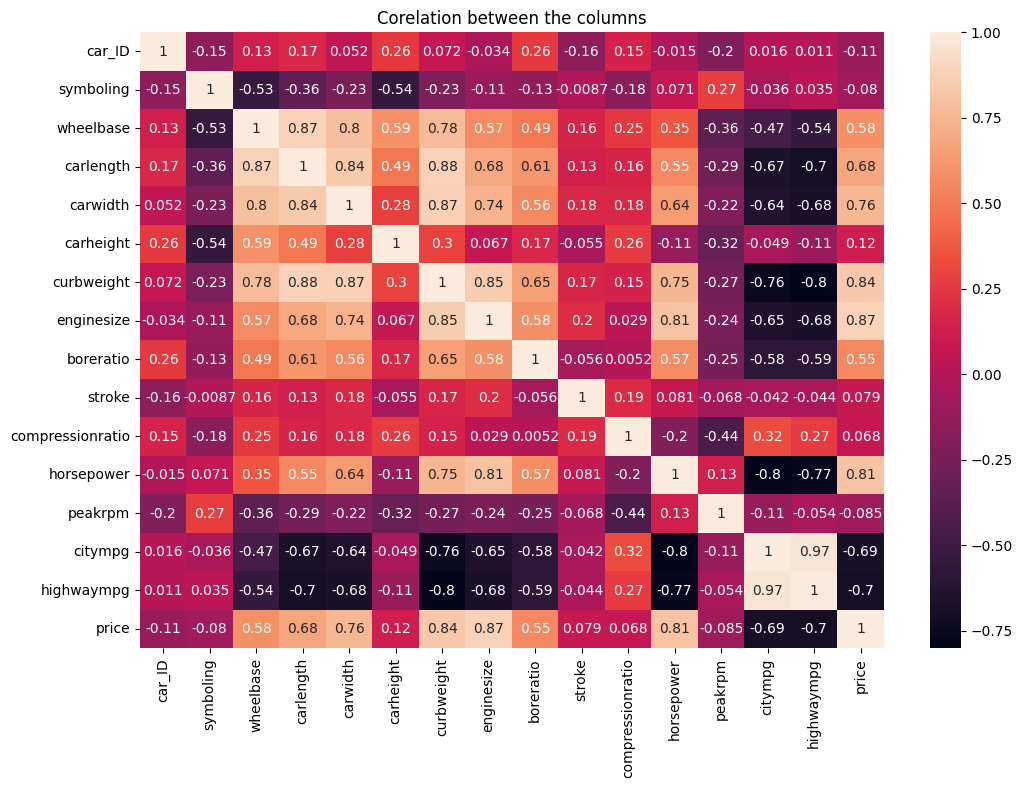

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Corelation between the columns")

In [ ]:
x=df.drop(['price','CarName','fueltype','car_ID','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1)

In [ ]:
y=df['price'].values

In [ ]:
print(f"x shape : {x.shape}  y shape : {y.shape}")

x shape : (205, 14)  y shape : (205,)


In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25,random_state=42)
print("X-train : ",x_train.shape)
print("X-test : ",x_test.shape)
print("y-train : ",y_train.shape)
print("y-test : ",y_test.shape)

X-train :  (153, 14)
X-test :  (52, 14)
y-train :  (153,)
y-test :  (52,)


In [ ]:
regressor=LinearRegression()


In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([ 3.25033440e+02,  1.50260113e+02, -7.17757504e+01,  5.45217217e+02,
        1.92150443e+02,  3.17924493e-01,  1.20842016e+02, -4.47764754e+02,
       -3.31158130e+03,  3.28989810e+02,  2.12175587e+01,  2.48453811e+00,
       -3.76792020e+02,  1.41053590e+02])

In [ ]:
regressor.intercept_

-52643.59184900823

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred.shape

(52,)

In [ ]:
result=pd.DataFrame({'Actual':y_test,'Produced':y_pred})

In [ ]:
result

,Actual,Produced
0,30760.000,26940.759445
1,17859.167,17106.174440
2,9549.000,10221.780332
3,11850.000,15058.320514
4,28248.000,24842.846380
5,7799.000,6096.844091
6,7788.000,8597.735112
7,9258.000,6735.506658
8,10198.000,11615.502885
9,7775.000,9693.771498


In [ ]:
residual_error=abs(y_test-y_pred)
residual_error

array([ 3819.24055487,   752.9925599 ,   672.78033192,  3208.32051416,
        3405.15361981,  1702.15590875,   809.73511151,  2522.49334189,
        1417.50288452,  1918.77149836,  2890.36188851,  2142.9956652 ,
        1361.55740014,  1665.24408551,    24.59046026,   429.48997769,
        7801.13412193,  2869.48291643,  1889.93447277,  1424.84356496,
        1885.90675686,  9041.2711415 ,  1513.64248929,  6702.77924299,
         352.23463472, 14510.15915219,  4137.22737995,  3547.76021355,
        2191.03295172,  3409.14440918,  1206.59685023,   103.77102645,
        1321.88886117,  3239.52728314,   681.95758413,  4071.18342869,
         234.67072406,  1145.54935097,  4248.51376393,  1034.5722467 ,
        1862.29692717,  4811.94553547,  2881.8708564 ,  1146.9682344 ,
        1168.16434805,   960.6061295 ,   103.77102645,  1974.33453405,
         884.98967044,  2386.07003038,  1313.10768083,  5264.26845759])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ",(metrics.mean_squared_error(pred,y_test)))
print("MAE : ",(metrics.mean_absolute_error(pred,y_test)))
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE :  12778023.31224061
MAE :  2539.7416115618244
R2 Score :  0.7961095379581435


In [ ]:
pred2 = model.predict([[3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27]])
pred2.round(2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13579.49])

In [ ]:
sum(residual_error)/len(residual_error)

2539.7416115618244

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

2539.7416115618244

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.22550952409385505

In [ ]:
regressor.score(x_test,y_test)

0.8111423178283066

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [ ]:


train_pred = knn.predict(x_train)

In [ ]:
test_pred = knn.predict(x_test)

In [ ]:
print(train_pred,test_pred)

[ 6692.2  9294.4  6729.  11211.4  9878.  14898.  26434.8  5819.8  9386.2
 16157.  11933.4 14507.2 10546.2  7020.6 15613.2  7020.6 18789.6 11173.
  7314.  18789.6  8343.8  6435.  17437.  11994.2 13088.  14336.8  6509.6
  8412.2  6546.2 18789.6 18178.  20017.  14336.8  6290.2 12620.4  9139.8
 26434.8  8645.   6646.2  7020.6 18737.   9386.2  5661.8 13600.  13160.6
  7020.6 13088.  17441.8  7695.6 18789.6  8412.2 26434.8 18178.   7695.6
 18789.6  5661.8 17437.   8693.8 15668.   9516.2 13088.   9788.6  5819.8
  6692.2 10576.  11426.4  7839.4  8192.6 28423.8 15610.4  9788.6  6567.9
 11994.2 11426.4 13088.  17330.  11426.4  8412.2 15489.4 10094.6  8223.4
 12078.  13943.8 34608.   6729.   8693.8  9140.6  8343.8 10705.6 17347.4
  6435.  12612.6  8192.6  7471.6  9617.4 34608.  10492.4  7020.6 17616.
 17330.   6729.  14507.2 17347.4  8701.8  6729.  20017.  18346.6  9386.2
  9294.4 10105.4 23365.7 36488.  17347.4 12612.6 10576.  16813.2 10199.2
  6435.  15664.4  6435.  17536.4 10515.2 14102.  3460

In [ ]:
r2 = r2_score(y_test,test_pred)
r2

0.7833487254094117